# Flooding

This notebook is for conducting data analysis about floods around Berkeley.

In [1]:
# include import statements here
import numpy as np
import pandas as pd


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')


import zipfile
from pathlib import Path
import regex as re


import os
import plotly


from pathlib import Path
data_dir = Path('.')
data_dir.mkdir(exist_ok = True)
file_path = data_dir / Path('data.zip')
dest_path = file_path


import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap


import geocoder
from geopy import *


from geopy.geocoders import Nominatim

In [2]:
us_disaster_declarations = pd.read_csv('/work/us_disaster_declarations.csv')
us_disaster_declarations.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,deb98e5688deba24cdce35e6ead78158fd80f741,8f8b4a86-847f-422c-b2a3-bbdb2f2ee9d7,2022-07-20T21:22:24Z
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,319d7571fad2f0f6a3270e968fc1497ee4483831,4926ca15-ee98-4d43-9636-4c3e4d1308d2,2022-07-20T21:22:24Z
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,5eca2ab08254fda0184630d798f5a17b95bd39f7,5c899b70-3999-47c0-80c7-e5cb8908a048,2022-07-20T21:22:24Z
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,af9856b9f1e8ada710ff92690a1cfec368f9b315,8f69798b-4084-41b9-a389-f0c51ebac066,2022-07-20T21:22:24Z
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,750685661b7d2fbdbc7d967c7ef3bf563df8cca1,cc3997c1-06bc-43d8-a3cc-3696a73637f1,2022-07-20T21:22:24Z


In [3]:
california_declarations = us_disaster_declarations[us_disaster_declarations['state']=='CA']
california_declarations.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh
13,DR-15-CA,15,CA,DR,1954-02-05T00:00:00Z,1954,Flood,Flood & Erosion,0,1,...,1954-02-05T00:00:00Z,1957-09-01T00:00:00Z,6000,0,Statewide,54016,NaN,b9d9d964afb44d13bf4523a9f9f34bd4bf37d878,221ce5bd-ddc9-4e10-90c5-fd64af40afd6,2022-07-20T21:22:24Z
45,DR-47-CA,47,CA,DR,1955-12-23T00:00:00Z,1956,Flood,Flood,0,1,...,1955-12-23T00:00:00Z,1968-08-12T00:00:00Z,6000,0,Statewide,55018,NaN,ce248645f34aa0b5b09bbfaa94a40f2678ca0dc6,abe2391f-ae6d-4788-9d02-e24406d4acd5,2022-07-20T21:22:24Z
63,DR-65-CA,65,CA,DR,1956-12-29T00:00:00Z,1957,Fire,Forest Fire,0,1,...,1956-12-29T00:00:00Z,1959-04-01T00:00:00Z,6000,0,Statewide,56018,NaN,2da4841862eda1f4fcd8df823dd6d5b9aafc75e9,a60aeb2d-a043-416b-98c1-3d851ff45537,2022-07-20T21:22:24Z
80,DR-82-CA,82,CA,DR,1958-04-04T00:00:00Z,1958,Flood,Heavy Rainstorms & Flood,0,1,...,1958-04-04T00:00:00Z,1961-08-01T00:00:00Z,6000,0,Statewide,58012,NaN,ad02f00fa339f60d3491f317d1b7da9d585b33cc,85c5c28a-17e2-4231-8d45-d6428e463565,2022-07-20T21:22:24Z
117,DR-119-CA,119,CA,DR,1961-11-16T00:00:00Z,1962,Fire,Fire (Los Angeles County),0,1,...,1961-11-16T00:00:00Z,1963-08-01T00:00:00Z,6000,0,Statewide,61019,NaN,bc73e1a3bdf7219da3eba06947081dcb93fd3645,ffca6d1a-add8-42dd-80db-bc838058195b,2022-07-20T21:22:24Z


In [4]:
contracosta_data = california_declarations[california_declarations['fips']==6013]
contracosta_data

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh
1225,DR-253-CA,253,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,1,...,1969-01-26T00:00:00Z,1976-04-19T00:00:00Z,6013,99013,Contra Costa (County),69016,NaN,842a22d78b8d94f31c866abda7b3fecae3c28d44,38bcace9-1e6c-4137-ba10-1f34f7010b46,2022-07-20T21:22:23Z
5195,EM-3023-CA,3023,CA,EM,1977-01-20T00:00:00Z,1977,Drought,Drought,0,0,...,1977-01-20T00:00:00Z,1978-12-20T00:00:00Z,6013,99013,Contra Costa (County),77024,NaN,a21738d48ec0fccfbbfa8fe7672068240798dd03,1ff317d7-4e9b-4e17-ba49-08315a8acbb6,2022-07-20T21:21:57Z
7256,EM-3078-CA,3078,CA,EM,1980-02-01T00:00:00Z,1980,Coastal Storm,"Torrential Rain, High Tide & Winds",0,0,...,1980-02-01T00:00:00Z,1986-03-27T00:00:00Z,6013,99013,Contra Costa (County),80012,NaN,4d99ee4111837eedf6cb4508d85b85055bdb0c8d,f8182f0d-c6a5-4c99-856b-95f733c59873,2022-07-20T21:21:56Z
7520,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1982-01-08T00:00:00Z,1995-04-13T00:00:00Z,6013,99013,Contra Costa (County),82006,NaN,b28af019ffe8d12108d2a21e33009d91b59f0404,e3b3d13b-3b37-4710-bd88-0d51b4f4c73e,2022-07-20T21:22:18Z
7723,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,1983-03-30T00:00:00Z,2000-09-25T00:00:00Z,6013,99013,Contra Costa (County),83017,NaN,06740e0744dadedcfe906895cb5b5125b606687a,6f875abb-ea56-4cc8-a494-92ffdbdbe2c4,2022-07-20T21:22:17Z
8485,DR-758-CA,758,CA,DR,1986-02-21T00:00:00Z,1986,Flood,Severe Storms & Flooding,0,1,...,1986-03-10T00:00:00Z,1997-07-14T00:00:00Z,6013,99013,Contra Costa (County),86003,NaN,323aedaeda404dd02bb3f8e493dcdccef8dee96e,12920db3-0a34-4a2c-8693-08ce946dc48c,2022-07-20T21:22:16Z
9435,DR-845-CA,845,CA,DR,1989-10-18T00:00:00Z,1990,Earthquake,Loma Prieta Earthquake,0,1,...,1989-12-18T00:00:00Z,2011-02-10T00:00:00Z,6013,99013,Contra Costa (County),89043,NaN,90876838c6ba2f26dd88c103a9c972b49a47df2c,ce51310f-7871-4c27-a6ea-022ae2f65ec0,2022-07-20T21:22:15Z
11110,DR-979-CA,979,CA,DR,1993-02-03T00:00:00Z,1993,Flood,"Severe Winter Storm, Mud & Land Slides, & Floo...",0,1,...,1993-03-20T00:00:00Z,2011-02-10T00:00:00Z,6013,99013,Contra Costa (County),93004,NaN,011e9afd36fcfeae70c7dcb350f294f132d13ae5,85b71f74-1281-480f-980c-efb93d3abdef,2022-07-20T21:22:13Z
13508,DR-1044-CA,1044,CA,DR,1995-01-10T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding, Landslides, Mu...",0,1,...,1995-02-10T00:00:00Z,2012-05-02T00:00:00Z,6013,99013,Contra Costa (County),95009,NaN,82e7efa9f13489e5e4bc113c4364f5b17d2f2c86,c274b2ea-e017-43d7-926c-93569d65f5ec,2022-10-29T12:22:12Z
13566,DR-1046-CA,1046,CA,DR,1995-03-12T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding Landslides, Mud...",0,1,...,1995-04-19T00:00:00Z,2012-07-17T00:00:00Z,6013,99013,Contra Costa (County),95017,NaN,e40c2806668b1725b1121886cb0af9b2d46e39ef,52579666-0802-461e-9982-9bc111fba90f,2022-10-29T12:22:12Z


In [5]:
santaclara_data = california_declarations[california_declarations['fips']==6085]
santaclara_data

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh
5198,EM-3023-CA,3023,CA,EM,1977-01-20T00:00:00Z,1977,Drought,Drought,0,0,...,1977-01-20T00:00:00Z,1978-12-20T00:00:00Z,6085,99085,Santa Clara (County),77024,NaN,7e005251b6f245ce005b23382d78bddcfcdc50d6,6fea3a06-daa4-4b18-905a-34a4bd4c33f6,2022-07-20T21:21:57Z
7516,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,0,...,1982-01-08T00:00:00Z,1995-04-13T00:00:00Z,6085,99085,Santa Clara (County),82006,NaN,3e22e16ade46ecf52e3fcc32287d997ccb93c20e,57b4c620-2296-4e88-9f55-d01b90dccfe3,2022-07-20T21:22:18Z
7726,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,1983-03-30T00:00:00Z,2000-09-25T00:00:00Z,6085,99085,Santa Clara (County),83017,NaN,743bbede65cf267d9a9ad42823267e55bd302cb6,663d1226-da8d-40bf-8e43-c6c7fd90d5e4,2022-07-20T21:22:17Z
8244,DR-739-CA,739,CA,DR,1985-07-18T00:00:00Z,1985,Fire,"Grass, Wildlands, & Forest Fires",0,1,...,1985-07-19T00:00:00Z,1994-10-24T00:00:00Z,6085,99085,Santa Clara (County),85035,NaN,74f9b8c1ac8623ad10b2b2032586a71463eff02d,a0d35ea1-1178-47d6-8ec0-c3c2f80060e6,2022-07-20T21:22:17Z
8511,DR-758-CA,758,CA,DR,1986-02-21T00:00:00Z,1986,Flood,Severe Storms & Flooding,0,1,...,1986-03-10T00:00:00Z,1997-07-14T00:00:00Z,6085,99085,Santa Clara (County),86003,NaN,7346ea51886f5c1cc2ef5ca3e3729a216385b768,a26ef063-1f3b-4d19-a5ef-b49720882c4a,2022-07-20T21:22:16Z
9433,DR-845-CA,845,CA,DR,1989-10-18T00:00:00Z,1990,Earthquake,Loma Prieta Earthquake,0,1,...,1989-12-18T00:00:00Z,2011-02-10T00:00:00Z,6085,99085,Santa Clara (County),89043,NaN,d202f45b9c60e77b145713421ca551aef8961803,f6684114-f8f1-4245-9adf-ff2361e40d17,2022-07-20T21:22:15Z
10219,DR-894-CA,894,CA,DR,1991-02-11T00:00:00Z,1991,Freezing,Severe Freeze,0,1,...,1991-01-03T00:00:00Z,1997-05-29T00:00:00Z,6085,99085,Santa Clara (County),91007,NaN,79a9aba5d4d514e22178c1c6a44c6b9005afab37,fd2b65df-cae3-46c3-8d77-72195a4b3846,2022-07-20T21:22:14Z
13495,DR-1044-CA,1044,CA,DR,1995-01-10T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding, Landslides, Mu...",0,1,...,1995-02-10T00:00:00Z,2012-05-02T00:00:00Z,6085,99085,Santa Clara (County),95009,NaN,6cc28481a938f827bcd4987ad1877724f319ecdc,760c71a7-0d61-49bd-b2a8-5590a2aa903b,2022-10-29T12:22:12Z
13569,DR-1046-CA,1046,CA,DR,1995-03-12T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding Landslides, Mud...",0,1,...,1995-04-19T00:00:00Z,2012-07-17T00:00:00Z,6085,99085,Santa Clara (County),95017,NaN,d38f42d163406b589ff12cc7614dcfa053308c1a,d9ca5b6e-6af1-4c5c-9dc2-6769d2efa6c2,2022-10-29T12:22:12Z
15816,DR-1155-CA,1155,CA,DR,1997-01-04T00:00:00Z,1997,Severe Storm,"Severe Storms, Flooding, Mud And Landslides",0,1,...,1997-04-01T00:00:00Z,2013-07-01T00:00:00Z,6085,99085,Santa Clara (County),97029,NaN,179d3b084d67869c752780cfaf52739ecbe1cef7,6b8492e6-c2a5-4253-837c-3e306a47eafe,2022-10-29T12:22:09Z


In [6]:
alameda_data = california_declarations[california_declarations['fips']==6001]
alameda_data

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh
1726,DR-283-CA,283,CA,DR,1970-02-16T00:00:00Z,1970,Flood,Severe Storms & Flooding,0,1,...,1970-02-16T00:00:00Z,1976-06-16T00:00:00Z,6001,99001,Alameda (County),70010,NaN,217ffacc2dd80d31aedee491722b06e8c1e15dec,16bd434f-3070-42d9-98f8-411d5cfecfd7,2022-07-20T21:22:22Z
1850,DR-295-CA,295,CA,DR,1970-09-29T00:00:00Z,1970,Fire,Forest & Brush Fires,0,1,...,1970-09-29T00:00:00Z,1976-11-12T00:00:00Z,6001,99001,Alameda (County),70022,NaN,b3549f8e9bcc09f46098f9da3bbb2ca4212e7974,56e3fedf-e916-45e6-b075-d0008ff2580a,2022-07-20T21:22:22Z
5212,EM-3023-CA,3023,CA,EM,1977-01-20T00:00:00Z,1977,Drought,Drought,0,0,...,1977-01-20T00:00:00Z,1978-12-20T00:00:00Z,6001,99001,Alameda (County),77024,NaN,c34f3de0aa406ba5e3dfdde1f8e322a30c199e85,7f322f71-f864-4c48-8b2b-551221bc5e1b,2022-07-20T21:21:57Z
7515,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1982-01-08T00:00:00Z,1995-04-13T00:00:00Z,6001,99001,Alameda (County),82006,NaN,e5c96b0d99f30a75183fd506836751e7e39fbf6d,2d651822-8928-4dcc-9a9b-b4636997b414,2022-07-20T21:22:18Z
7711,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,1983-03-30T00:00:00Z,2000-09-25T00:00:00Z,6001,99001,Alameda (County),83017,NaN,cbb787feb3c668681e67d072384c50e0fed5052b,6d5feefb-bcd5-4cb1-8d32-1945c77eecec,2022-07-20T21:22:17Z
8490,DR-758-CA,758,CA,DR,1986-02-21T00:00:00Z,1986,Flood,Severe Storms & Flooding,0,1,...,1986-03-10T00:00:00Z,1997-07-14T00:00:00Z,6001,99001,Alameda (County),86003,NaN,f7c260d12469488c620e54781bda2421380e10e7,54a84e99-6c92-4bc9-9873-3ca6027fedf4,2022-07-20T21:22:16Z
9426,DR-845-CA,845,CA,DR,1989-10-18T00:00:00Z,1990,Earthquake,Loma Prieta Earthquake,0,1,...,1989-12-18T00:00:00Z,2011-02-10T00:00:00Z,6001,99001,Alameda (County),89043,NaN,9ddd1171aa2360e1f42abeee752a33e08b4bdbd4,7ae12a5e-a1c6-47aa-80a3-853ed3871ee5,2022-07-20T21:22:15Z
10232,DR-894-CA,894,CA,DR,1991-02-11T00:00:00Z,1991,Freezing,Severe Freeze,0,1,...,1991-01-03T00:00:00Z,1997-05-29T00:00:00Z,6001,99001,Alameda (County),91007,NaN,29b42067a87ae18c218caabe465ce028439f6d01,40b317d7-289c-44c8-b9dc-49b1a03ef47c,2022-07-20T21:22:14Z
10536,DR-919-CA,919,CA,DR,1991-10-22T00:00:00Z,1992,Fire,Oakland Hills Fire,0,1,...,1991-10-29T00:00:00Z,2010-07-29T00:00:00Z,6001,99001,Alameda (County),91047,NaN,23fa3e38ca7727fce66063a247ad49a5494b6f9a,e03df0ce-6da6-4f16-8047-d5a5c1430ed8,2022-07-20T21:22:14Z
13504,DR-1044-CA,1044,CA,DR,1995-01-10T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding, Landslides, Mu...",0,1,...,1995-02-10T00:00:00Z,2012-05-02T00:00:00Z,6001,99001,Alameda (County),95009,NaN,9971618bd19eb10298c0c37209dbe7373a9091ce,f40517ec-6819-452d-af2d-4e8238aea5c6,2022-10-29T12:22:12Z


In [7]:
alameda_data.shape

(23, 23)

In [8]:
bay_area_counties = ['San Francisco (County)', 'Alameda (County)', 'Napa (County)', 'Santa Clara (County)', 'Contra Costa (County)', 
'Solano (County)', 'Marin (County)', 'San Mateo (County)', 'Sonoma (County)']

sf_data = california_declarations[california_declarations['designated_area']=='San Francisco (County)']
napa_data = california_declarations[california_declarations['designated_area']=='Napa (County)']
solano_data = california_declarations[california_declarations['designated_area']=='Solano (County)']
marin_data = california_declarations[california_declarations['designated_area']=='Marin (County)']
alameda_data = california_declarations[california_declarations['designated_area']=='Alameda (County)']
contracosta_data = california_declarations[california_declarations['designated_area']=='Contra Costa (County)']
santaclara_data = california_declarations[california_declarations['designated_area']=='Santa Clara (County)']

In [9]:
bay_area_data = california_declarations[california_declarations['designated_area'].isin(bay_area_counties)]
bay_area_data

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh
199,DR-183-CA,183,CA,DR,1964-12-24T00:00:00Z,1965,Flood,Heavy Rains & Flooding,0,1,...,1964-12-24T00:00:00Z,1976-04-05T00:00:00Z,6055,99055,Napa (County),64030,NaN,9d4616c21d7198cbdc8ef1282fefa83b0baf2072,ef702eaf-6c5f-41c0-843b-deb65abebc47,2022-07-20T21:22:24Z
219,DR-183-CA,183,CA,DR,1964-12-24T00:00:00Z,1965,Flood,Heavy Rains & Flooding,0,1,...,1964-12-24T00:00:00Z,1976-04-05T00:00:00Z,6041,99041,Marin (County),64030,NaN,ff2fe2714e06f1b5b52ad106ee2dc162b38b92b7,f505a156-8be0-4e33-a657-8fef9fd1d891,2022-07-20T21:22:24Z
228,DR-183-CA,183,CA,DR,1964-12-24T00:00:00Z,1965,Flood,Heavy Rains & Flooding,0,1,...,1964-12-24T00:00:00Z,1976-04-05T00:00:00Z,6095,99095,Solano (County),64030,NaN,562a1268f518bfa54f3ea9ee765451ebcf3880e8,b2d96a57-7895-4505-8e45-4d87d3e76674,2022-07-20T21:22:24Z
234,DR-183-CA,183,CA,DR,1964-12-24T00:00:00Z,1965,Flood,Heavy Rains & Flooding,0,1,...,1964-12-24T00:00:00Z,1976-04-05T00:00:00Z,6097,99097,Sonoma (County),64030,NaN,d778ab168b57d80d61f82142540cdcf336ba29f5,1e6fd79e-1da9-4a1c-87c6-60c8c964d3aa,2022-07-20T21:22:24Z
1210,DR-253-CA,253,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,1,...,1969-01-26T00:00:00Z,1976-04-19T00:00:00Z,6097,99097,Sonoma (County),69016,NaN,a37d2a49843b4537a7e6384b051300a3659a253a,e4c0244b-5911-4c1e-ae34-64c528183329,2022-07-20T21:22:23Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63942,DR-4683-CA,4683,CA,DR,2023-01-14T00:00:00Z,2023,Flood,"Severe Winter Storms, Flooding, Landslides, An...",1,0,...,2023-01-31T00:00:00Z,NaN,6001,99001,Alameda (County),23004,2023-03-16T00:00:00Z,bd64e40dda4761b50e6c983d1330913471a7afe0,f654fcb6-6eb3-48bc-8af0-2cf7f34f692a,2023-02-06T22:02:45Z
63956,DR-4683-CA,4683,CA,DR,2023-01-14T00:00:00Z,2023,Flood,"Severe Winter Storms, Flooding, Landslides, An...",0,0,...,2023-01-31T00:00:00Z,NaN,6095,99095,Solano (County),23004,2023-03-16T00:00:00Z,e24c28b892c87b21cddc55c1c0b7a824f00323fa,5c6a52f9-221b-4bf0-aaa0-37bd98007c48,2023-02-17T00:01:37Z
63959,DR-4683-CA,4683,CA,DR,2023-01-14T00:00:00Z,2023,Flood,"Severe Winter Storms, Flooding, Landslides, An...",0,0,...,2023-01-31T00:00:00Z,NaN,6055,99055,Napa (County),23004,2023-03-16T00:00:00Z,51f066bfafdca064cebf7dc104d3030baf303ab7,787bd5a6-99f5-422a-9a27-03274f55c409,2023-02-17T00:01:37Z
63962,DR-4683-CA,4683,CA,DR,2023-01-14T00:00:00Z,2023,Flood,"Severe Winter Storms, Flooding, Landslides, An...",0,0,...,2023-01-31T00:00:00Z,NaN,6075,99075,San Francisco (County),23004,2023-03-16T00:00:00Z,448efa782177654233e7ff2fb083c84cd1b09485,2bde4d7e-5021-4571-8209-fd9154f74828,2023-02-17T00:01:37Z


In [10]:
target_area_counties = bay_area_counties = ['San Francisco (County)', 'Alameda (County)', 'Contra Costa (County)']
target_area_data = california_declarations[california_declarations['designated_area'].isin(target_area_counties)]
target_area_data

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh
1225,DR-253-CA,253,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,1,...,1969-01-26T00:00:00Z,1976-04-19T00:00:00Z,6013,99013,Contra Costa (County),69016,NaN,842a22d78b8d94f31c866abda7b3fecae3c28d44,38bcace9-1e6c-4137-ba10-1f34f7010b46,2022-07-20T21:22:23Z
1726,DR-283-CA,283,CA,DR,1970-02-16T00:00:00Z,1970,Flood,Severe Storms & Flooding,0,1,...,1970-02-16T00:00:00Z,1976-06-16T00:00:00Z,6001,99001,Alameda (County),70010,NaN,217ffacc2dd80d31aedee491722b06e8c1e15dec,16bd434f-3070-42d9-98f8-411d5cfecfd7,2022-07-20T21:22:22Z
1850,DR-295-CA,295,CA,DR,1970-09-29T00:00:00Z,1970,Fire,Forest & Brush Fires,0,1,...,1970-09-29T00:00:00Z,1976-11-12T00:00:00Z,6001,99001,Alameda (County),70022,NaN,b3549f8e9bcc09f46098f9da3bbb2ca4212e7974,56e3fedf-e916-45e6-b075-d0008ff2580a,2022-07-20T21:22:22Z
5195,EM-3023-CA,3023,CA,EM,1977-01-20T00:00:00Z,1977,Drought,Drought,0,0,...,1977-01-20T00:00:00Z,1978-12-20T00:00:00Z,6013,99013,Contra Costa (County),77024,NaN,a21738d48ec0fccfbbfa8fe7672068240798dd03,1ff317d7-4e9b-4e17-ba49-08315a8acbb6,2022-07-20T21:21:57Z
5212,EM-3023-CA,3023,CA,EM,1977-01-20T00:00:00Z,1977,Drought,Drought,0,0,...,1977-01-20T00:00:00Z,1978-12-20T00:00:00Z,6001,99001,Alameda (County),77024,NaN,c34f3de0aa406ba5e3dfdde1f8e322a30c199e85,7f322f71-f864-4c48-8b2b-551221bc5e1b,2022-07-20T21:21:57Z
7256,EM-3078-CA,3078,CA,EM,1980-02-01T00:00:00Z,1980,Coastal Storm,"Torrential Rain, High Tide & Winds",0,0,...,1980-02-01T00:00:00Z,1986-03-27T00:00:00Z,6013,99013,Contra Costa (County),80012,NaN,4d99ee4111837eedf6cb4508d85b85055bdb0c8d,f8182f0d-c6a5-4c99-856b-95f733c59873,2022-07-20T21:21:56Z
7515,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1982-01-08T00:00:00Z,1995-04-13T00:00:00Z,6001,99001,Alameda (County),82006,NaN,e5c96b0d99f30a75183fd506836751e7e39fbf6d,2d651822-8928-4dcc-9a9b-b4636997b414,2022-07-20T21:22:18Z
7520,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1982-01-08T00:00:00Z,1995-04-13T00:00:00Z,6013,99013,Contra Costa (County),82006,NaN,b28af019ffe8d12108d2a21e33009d91b59f0404,e3b3d13b-3b37-4710-bd88-0d51b4f4c73e,2022-07-20T21:22:18Z
7711,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,1983-03-30T00:00:00Z,2000-09-25T00:00:00Z,6001,99001,Alameda (County),83017,NaN,cbb787feb3c668681e67d072384c50e0fed5052b,6d5feefb-bcd5-4cb1-8d32-1945c77eecec,2022-07-20T21:22:17Z
7723,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,1983-03-30T00:00:00Z,2000-09-25T00:00:00Z,6013,99013,Contra Costa (County),83017,NaN,06740e0744dadedcfe906895cb5b5125b606687a,6f875abb-ea56-4cc8-a494-92ffdbdbe2c4,2022-07-20T21:22:17Z


In [11]:
target_area_data['incident_type'].value_counts()

Flood            17
Severe Storm     16
Biological        6
Hurricane         3
Earthquake        3
Coastal Storm     3
Drought           2
Fire              2
Freezing          1
Name: incident_type, dtype: int64

In [12]:
target_area_data[target_area_data['incident_type']=='Severe Storm']

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh
13504,DR-1044-CA,1044,CA,DR,1995-01-10T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding, Landslides, Mu...",0,1,...,1995-02-10T00:00:00Z,2012-05-02T00:00:00Z,6001,99001,Alameda (County),95009,NaN,9971618bd19eb10298c0c37209dbe7373a9091ce,f40517ec-6819-452d-af2d-4e8238aea5c6,2022-10-29T12:22:12Z
13508,DR-1044-CA,1044,CA,DR,1995-01-10T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding, Landslides, Mu...",0,1,...,1995-02-10T00:00:00Z,2012-05-02T00:00:00Z,6013,99013,Contra Costa (County),95009,NaN,82e7efa9f13489e5e4bc113c4364f5b17d2f2c86,c274b2ea-e017-43d7-926c-93569d65f5ec,2022-10-29T12:22:12Z
13537,DR-1046-CA,1046,CA,DR,1995-03-12T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding Landslides, Mud...",0,1,...,1995-04-19T00:00:00Z,2012-07-17T00:00:00Z,6001,99001,Alameda (County),95017,NaN,acb1081b8b62b9bb9089f6fb5b2018461d079759,0ccb0843-e097-4ebf-9daa-4176a3d1e919,2022-10-29T12:22:12Z
13541,DR-1046-CA,1046,CA,DR,1995-03-12T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding Landslides, Mud...",0,1,...,1995-04-19T00:00:00Z,2012-07-17T00:00:00Z,6075,99075,San Francisco (County),95017,NaN,4c648a6f1fd9a308f3a7ba43a9928559e7c2a8f4,5abbb12d-0380-432e-b810-425022342b85,2022-10-29T12:22:12Z
13566,DR-1046-CA,1046,CA,DR,1995-03-12T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding Landslides, Mud...",0,1,...,1995-04-19T00:00:00Z,2012-07-17T00:00:00Z,6013,99013,Contra Costa (County),95017,NaN,e40c2806668b1725b1121886cb0af9b2d46e39ef,52579666-0802-461e-9982-9bc111fba90f,2022-10-29T12:22:12Z
15796,DR-1155-CA,1155,CA,DR,1997-01-04T00:00:00Z,1997,Severe Storm,"Severe Storms, Flooding, Mud And Landslides",0,1,...,1997-04-01T00:00:00Z,2013-07-01T00:00:00Z,6013,99013,Contra Costa (County),97029,NaN,bf36d917debd7a1edadd5f7f8258f1e871cb699e,6eb2aec8-bc1e-4bff-9598-63da247a961a,2022-10-29T12:22:09Z
15805,DR-1155-CA,1155,CA,DR,1997-01-04T00:00:00Z,1997,Severe Storm,"Severe Storms, Flooding, Mud And Landslides",0,1,...,1997-04-01T00:00:00Z,2013-07-01T00:00:00Z,6075,99075,San Francisco (County),97029,NaN,924f48e91b5c4f4bc0c4a5e7e43caf3349535bdc,30b9c52c-5db8-4f4f-8898-729a8854fd83,2022-10-29T12:22:09Z
15806,DR-1155-CA,1155,CA,DR,1997-01-04T00:00:00Z,1997,Severe Storm,"Severe Storms, Flooding, Mud And Landslides",0,1,...,1997-04-01T00:00:00Z,2013-07-01T00:00:00Z,6001,99001,Alameda (County),97029,NaN,660456fd427cad416e6692cb33a79af89f869a4b,a8856dcb-a3c4-443e-a65e-e19fbb0f970f,2022-10-29T12:22:09Z
16871,DR-1203-CA,1203,CA,DR,1998-02-09T00:00:00Z,1998,Severe Storm,Severe Winter Storms And Flooding,0,1,...,1998-04-30T00:00:00Z,2014-07-22T00:00:00Z,6013,99013,Contra Costa (County),98016,NaN,65728774c7a119f2aad3285410574c98e4a911f3,87e783ea-0083-4d2b-b98c-8dcc7a03753d,2022-10-29T12:22:08Z
16881,DR-1203-CA,1203,CA,DR,1998-02-09T00:00:00Z,1998,Severe Storm,Severe Winter Storms And Flooding,0,1,...,1998-04-30T00:00:00Z,2014-07-22T00:00:00Z,6001,99001,Alameda (County),98016,NaN,ebcd7feb221a3b6b5d0f1c7e7c4c0fa105853972,986e5898-5792-4fb0-b409-60624c5ded9a,2022-10-29T12:22:08Z


In [13]:
word = 'flood'
is_flood = []
for i in target_area_data['declaration_title']:
    description = i
    if word in description.lower():
        is_flood.append(1)
    else:
        is_flood.append(0)
target_area_data['is_flood'] = is_flood
target_area_data

/tmp/ipykernel_289/3923450998.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_area_data['is_flood'] = is_flood


,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh,is_flood
1225,DR-253-CA,253,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,1,...,1976-04-19T00:00:00Z,6013,99013,Contra Costa (County),69016,NaN,842a22d78b8d94f31c866abda7b3fecae3c28d44,38bcace9-1e6c-4137-ba10-1f34f7010b46,2022-07-20T21:22:23Z,1
1726,DR-283-CA,283,CA,DR,1970-02-16T00:00:00Z,1970,Flood,Severe Storms & Flooding,0,1,...,1976-06-16T00:00:00Z,6001,99001,Alameda (County),70010,NaN,217ffacc2dd80d31aedee491722b06e8c1e15dec,16bd434f-3070-42d9-98f8-411d5cfecfd7,2022-07-20T21:22:22Z,1
1850,DR-295-CA,295,CA,DR,1970-09-29T00:00:00Z,1970,Fire,Forest & Brush Fires,0,1,...,1976-11-12T00:00:00Z,6001,99001,Alameda (County),70022,NaN,b3549f8e9bcc09f46098f9da3bbb2ca4212e7974,56e3fedf-e916-45e6-b075-d0008ff2580a,2022-07-20T21:22:22Z,0
5195,EM-3023-CA,3023,CA,EM,1977-01-20T00:00:00Z,1977,Drought,Drought,0,0,...,1978-12-20T00:00:00Z,6013,99013,Contra Costa (County),77024,NaN,a21738d48ec0fccfbbfa8fe7672068240798dd03,1ff317d7-4e9b-4e17-ba49-08315a8acbb6,2022-07-20T21:21:57Z,0
5212,EM-3023-CA,3023,CA,EM,1977-01-20T00:00:00Z,1977,Drought,Drought,0,0,...,1978-12-20T00:00:00Z,6001,99001,Alameda (County),77024,NaN,c34f3de0aa406ba5e3dfdde1f8e322a30c199e85,7f322f71-f864-4c48-8b2b-551221bc5e1b,2022-07-20T21:21:57Z,0
7256,EM-3078-CA,3078,CA,EM,1980-02-01T00:00:00Z,1980,Coastal Storm,"Torrential Rain, High Tide & Winds",0,0,...,1986-03-27T00:00:00Z,6013,99013,Contra Costa (County),80012,NaN,4d99ee4111837eedf6cb4508d85b85055bdb0c8d,f8182f0d-c6a5-4c99-856b-95f733c59873,2022-07-20T21:21:56Z,0
7515,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1995-04-13T00:00:00Z,6001,99001,Alameda (County),82006,NaN,e5c96b0d99f30a75183fd506836751e7e39fbf6d,2d651822-8928-4dcc-9a9b-b4636997b414,2022-07-20T21:22:18Z,1
7520,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1995-04-13T00:00:00Z,6013,99013,Contra Costa (County),82006,NaN,b28af019ffe8d12108d2a21e33009d91b59f0404,e3b3d13b-3b37-4710-bd88-0d51b4f4c73e,2022-07-20T21:22:18Z,1
7711,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,2000-09-25T00:00:00Z,6001,99001,Alameda (County),83017,NaN,cbb787feb3c668681e67d072384c50e0fed5052b,6d5feefb-bcd5-4cb1-8d32-1945c77eecec,2022-07-20T21:22:17Z,1
7723,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,2000-09-25T00:00:00Z,6013,99013,Contra Costa (County),83017,NaN,06740e0744dadedcfe906895cb5b5125b606687a,6f875abb-ea56-4cc8-a494-92ffdbdbe2c4,2022-07-20T21:22:17Z,1


Every instance of a storm also recorded flooding happening.

In [14]:
target_area_flood = target_area_data[target_area_data['is_flood']==1]
target_area_flood

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh,is_flood
1225,DR-253-CA,253,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,1,...,1976-04-19T00:00:00Z,6013,99013,Contra Costa (County),69016,NaN,842a22d78b8d94f31c866abda7b3fecae3c28d44,38bcace9-1e6c-4137-ba10-1f34f7010b46,2022-07-20T21:22:23Z,1
1726,DR-283-CA,283,CA,DR,1970-02-16T00:00:00Z,1970,Flood,Severe Storms & Flooding,0,1,...,1976-06-16T00:00:00Z,6001,99001,Alameda (County),70010,NaN,217ffacc2dd80d31aedee491722b06e8c1e15dec,16bd434f-3070-42d9-98f8-411d5cfecfd7,2022-07-20T21:22:22Z,1
7515,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1995-04-13T00:00:00Z,6001,99001,Alameda (County),82006,NaN,e5c96b0d99f30a75183fd506836751e7e39fbf6d,2d651822-8928-4dcc-9a9b-b4636997b414,2022-07-20T21:22:18Z,1
7520,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1995-04-13T00:00:00Z,6013,99013,Contra Costa (County),82006,NaN,b28af019ffe8d12108d2a21e33009d91b59f0404,e3b3d13b-3b37-4710-bd88-0d51b4f4c73e,2022-07-20T21:22:18Z,1
7711,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,2000-09-25T00:00:00Z,6001,99001,Alameda (County),83017,NaN,cbb787feb3c668681e67d072384c50e0fed5052b,6d5feefb-bcd5-4cb1-8d32-1945c77eecec,2022-07-20T21:22:17Z,1
7723,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,2000-09-25T00:00:00Z,6013,99013,Contra Costa (County),83017,NaN,06740e0744dadedcfe906895cb5b5125b606687a,6f875abb-ea56-4cc8-a494-92ffdbdbe2c4,2022-07-20T21:22:17Z,1
8485,DR-758-CA,758,CA,DR,1986-02-21T00:00:00Z,1986,Flood,Severe Storms & Flooding,0,1,...,1997-07-14T00:00:00Z,6013,99013,Contra Costa (County),86003,NaN,323aedaeda404dd02bb3f8e493dcdccef8dee96e,12920db3-0a34-4a2c-8693-08ce946dc48c,2022-07-20T21:22:16Z,1
8490,DR-758-CA,758,CA,DR,1986-02-21T00:00:00Z,1986,Flood,Severe Storms & Flooding,0,1,...,1997-07-14T00:00:00Z,6001,99001,Alameda (County),86003,NaN,f7c260d12469488c620e54781bda2421380e10e7,54a84e99-6c92-4bc9-9873-3ca6027fedf4,2022-07-20T21:22:16Z,1
11110,DR-979-CA,979,CA,DR,1993-02-03T00:00:00Z,1993,Flood,"Severe Winter Storm, Mud & Land Slides, & Floo...",0,1,...,2011-02-10T00:00:00Z,6013,99013,Contra Costa (County),93004,NaN,011e9afd36fcfeae70c7dcb350f294f132d13ae5,85b71f74-1281-480f-980c-efb93d3abdef,2022-07-20T21:22:13Z,1
13504,DR-1044-CA,1044,CA,DR,1995-01-10T00:00:00Z,1995,Severe Storm,"Severe Winter Storms, Flooding, Landslides, Mu...",0,1,...,2012-05-02T00:00:00Z,6001,99001,Alameda (County),95009,NaN,9971618bd19eb10298c0c37209dbe7373a9091ce,f40517ec-6819-452d-af2d-4e8238aea5c6,2022-10-29T12:22:12Z,1


In [15]:
target_area_flood['declaration_title'].unique()

array(['Severe Storms & Flooding',
       'Severe Storms, Flood, Mudslides & High Tide',
       'Coastal Storms, Floods, Slides & Tornadoes',
       'Severe Winter Storm, Mud & Land Slides, & Flooding',
       'Severe Winter Storms, Flooding, Landslides, Mud Flows',
       'Severe Winter Storms, Flooding Landslides, Mud Flow',
       'Severe Storms, Flooding, Mud And Landslides',
       'Severe Winter Storms And Flooding',
       'Severe Storms, Flooding, Mudslides, And Landslides',
       'Severe Storms, Flooding, Landslides, And Mudslides',
       'Severe Winter Storms, Flooding, And Mudslides',
       'Severe Winter Storms, Flooding, Landslides, And Mudslides'],
      dtype=object)

In [16]:
target_area_flood['designated_area'].unique()

array(['Contra Costa (County)', 'Alameda (County)',
       'San Francisco (County)'], dtype=object)

In [17]:
# for i in target_area_flood['designated_area']:
#     # areas_str = i.str()
#     target_area_flood['designated_area'][i] = re.sub(r"\s?\(County\)", "", i)

Text(0.5, 0, 'County')

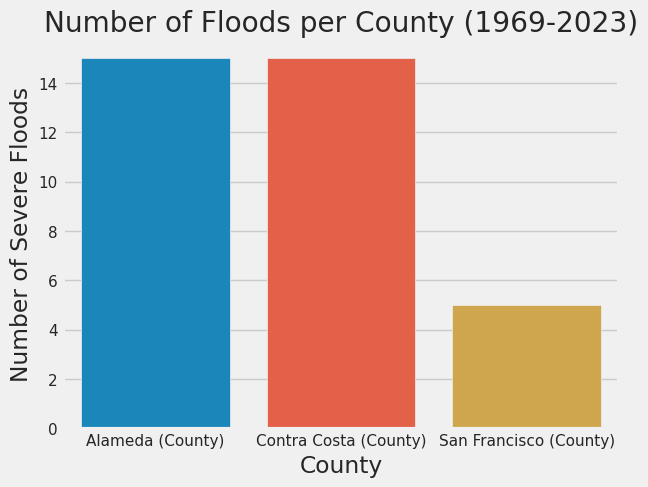

In [18]:
TA_flood_by_county = target_area_flood.groupby('designated_area', as_index=False).sum()
sns.barplot(data=TA_flood_by_county, x='designated_area', y='is_flood')
plt.title('Number of Floods per County (1969-2023)')
plt.ylabel('Number of Severe Floods')
plt.xlabel('County')

In [19]:
target_area_flood.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh,is_flood
1225,DR-253-CA,253,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,1,...,1976-04-19T00:00:00Z,6013,99013,Contra Costa (County),69016,NaN,842a22d78b8d94f31c866abda7b3fecae3c28d44,38bcace9-1e6c-4137-ba10-1f34f7010b46,2022-07-20T21:22:23Z,1
1726,DR-283-CA,283,CA,DR,1970-02-16T00:00:00Z,1970,Flood,Severe Storms & Flooding,0,1,...,1976-06-16T00:00:00Z,6001,99001,Alameda (County),70010,NaN,217ffacc2dd80d31aedee491722b06e8c1e15dec,16bd434f-3070-42d9-98f8-411d5cfecfd7,2022-07-20T21:22:22Z,1
7515,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1995-04-13T00:00:00Z,6001,99001,Alameda (County),82006,NaN,e5c96b0d99f30a75183fd506836751e7e39fbf6d,2d651822-8928-4dcc-9a9b-b4636997b414,2022-07-20T21:22:18Z,1
7520,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,1995-04-13T00:00:00Z,6013,99013,Contra Costa (County),82006,NaN,b28af019ffe8d12108d2a21e33009d91b59f0404,e3b3d13b-3b37-4710-bd88-0d51b4f4c73e,2022-07-20T21:22:18Z,1
7711,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,2000-09-25T00:00:00Z,6001,99001,Alameda (County),83017,NaN,cbb787feb3c668681e67d072384c50e0fed5052b,6d5feefb-bcd5-4cb1-8d32-1945c77eecec,2022-07-20T21:22:17Z,1


In [20]:
target_area_flood.columns

Index(['fema_declaration_string', 'disaster_number', 'state',
       'declaration_type', 'declaration_date', 'fy_declared', 'incident_type',
       'declaration_title', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'incident_begin_date',
       'incident_end_date', 'disaster_closeout_date', 'fips', 'place_code',
       'designated_area', 'declaration_request_number', 'last_ia_filing_date',
       'hash', 'id', 'last_refresh', 'is_flood'],
      dtype='object')

In [21]:
matches = ["mud", "slides", 'land']
is_landslide = []
for i in target_area_flood['declaration_title']:
    if any([x in i.lower() for x in matches]):
        is_landslide.append(1)
    else:
        is_landslide.append(0)
target_area_flood['caused_landslide'] = is_landslide
target_area_flood.head() 
# Where a storm caused a landside or mudslide too.

/tmp/ipykernel_289/1591425927.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_area_flood['caused_landslide'] = is_landslide


,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,id,last_refresh,is_flood,caused_landslide
1225,DR-253-CA,253,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,1,...,6013,99013,Contra Costa (County),69016,NaN,842a22d78b8d94f31c866abda7b3fecae3c28d44,38bcace9-1e6c-4137-ba10-1f34f7010b46,2022-07-20T21:22:23Z,1,0
1726,DR-283-CA,283,CA,DR,1970-02-16T00:00:00Z,1970,Flood,Severe Storms & Flooding,0,1,...,6001,99001,Alameda (County),70010,NaN,217ffacc2dd80d31aedee491722b06e8c1e15dec,16bd434f-3070-42d9-98f8-411d5cfecfd7,2022-07-20T21:22:22Z,1,0
7515,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,6001,99001,Alameda (County),82006,NaN,e5c96b0d99f30a75183fd506836751e7e39fbf6d,2d651822-8928-4dcc-9a9b-b4636997b414,2022-07-20T21:22:18Z,1,1
7520,DR-651-CA,651,CA,DR,1982-01-07T00:00:00Z,1982,Flood,"Severe Storms, Flood, Mudslides & High Tide",0,1,...,6013,99013,Contra Costa (County),82006,NaN,b28af019ffe8d12108d2a21e33009d91b59f0404,e3b3d13b-3b37-4710-bd88-0d51b4f4c73e,2022-07-20T21:22:18Z,1,1
7711,DR-677-CA,677,CA,DR,1983-02-09T00:00:00Z,1983,Coastal Storm,"Coastal Storms, Floods, Slides & Tornadoes",0,1,...,6001,99001,Alameda (County),83017,NaN,cbb787feb3c668681e67d072384c50e0fed5052b,6d5feefb-bcd5-4cb1-8d32-1945c77eecec,2022-07-20T21:22:17Z,1,1


In [22]:
target_area_flood = target_area_flood.drop(['hash', 'id', 'last_refresh', 'incident_begin_date', 'incident_end_date', 
'disaster_closeout_date', 'declaration_request_number', 'last_ia_filing_date', 'disaster_closeout_date', 
'ih_program_declared', 'ia_program_declared', 'pa_program_declared', 'hm_program_declared', 'state'], axis=1)

In [23]:
target_area_flood = target_area_flood.rename(columns={'declaration_title': 'Description', 'designated_area': "County", 
"fy_declared": "Year", 'fips': 'FIPS Code', 'declaration_date': 'Date'})
target_area_flood.columns

Index(['fema_declaration_string', 'disaster_number', 'declaration_type',
       'Date', 'Year', 'incident_type', 'Description', 'FIPS Code',
       'place_code', 'County', 'is_flood', 'caused_landslide'],
      dtype='object')

In [24]:
target_area_flood = target_area_flood[['FIPS Code', 'County', 'Year', 'Date', 'caused_landslide', 'is_flood', 'Description',
'incident_type', 'fema_declaration_string', 'disaster_number', 'place_code','declaration_type']].reset_index(drop=True)
target_area_flood.head()

,FIPS Code,County,Year,Date,caused_landslide,is_flood,Description,incident_type,fema_declaration_string,disaster_number,place_code,declaration_type
0,6013,Contra Costa (County),1969,1969-01-26T00:00:00Z,0,1,Severe Storms & Flooding,Flood,DR-253-CA,253,99013,DR
1,6001,Alameda (County),1970,1970-02-16T00:00:00Z,0,1,Severe Storms & Flooding,Flood,DR-283-CA,283,99001,DR
2,6001,Alameda (County),1982,1982-01-07T00:00:00Z,1,1,"Severe Storms, Flood, Mudslides & High Tide",Flood,DR-651-CA,651,99001,DR
3,6013,Contra Costa (County),1982,1982-01-07T00:00:00Z,1,1,"Severe Storms, Flood, Mudslides & High Tide",Flood,DR-651-CA,651,99013,DR
4,6001,Alameda (County),1983,1983-02-09T00:00:00Z,1,1,"Coastal Storms, Floods, Slides & Tornadoes",Coastal Storm,DR-677-CA,677,99001,DR


In [25]:
# target_area_flood.groupby('fy_declared', as_index=False).agg({"is_flood": 'sum'})
alameda = target_area_flood[target_area_flood['County']=='Alameda (County)'].groupby('Year', as_index=False).agg(lambda x: sum(x))
contracosta = target_area_flood[target_area_flood['County']=='Contra Costa (County)'].groupby('Year', as_index=False).agg(lambda x: sum(x))
sf = target_area_flood[target_area_flood['County']=='San Francisco (County)'].groupby('Year', as_index=False).agg(lambda x: sum(x))
sf

,Year,FIPS Code,caused_landslide,is_flood,disaster_number,place_code
0,1995,6075,1,1,1046,99075
1,1997,6075,1,1,1155,99075
2,1998,6075,0,1,1203,99075
3,2023,12150,2,2,8274,198150


Filled in missing flooding records in SF through Wiki.

In [26]:
new_df = pd.DataFrame({'Year': [1964, 1982, 1986], 'is_flood': [1, 1, 1]})
sf = pd.concat([sf, new_df], axis=0).reset_index(drop=True)
sf

,Year,FIPS Code,caused_landslide,is_flood,disaster_number,place_code
0,1995,6075.0,1.0,1,1046.0,99075.0
1,1997,6075.0,1.0,1,1155.0,99075.0
2,1998,6075.0,0.0,1,1203.0,99075.0
3,2023,12150.0,2.0,2,8274.0,198150.0
4,1964,NaN,NaN,1,NaN,NaN
5,1982,NaN,NaN,1,NaN,NaN
6,1986,NaN,NaN,1,NaN,NaN


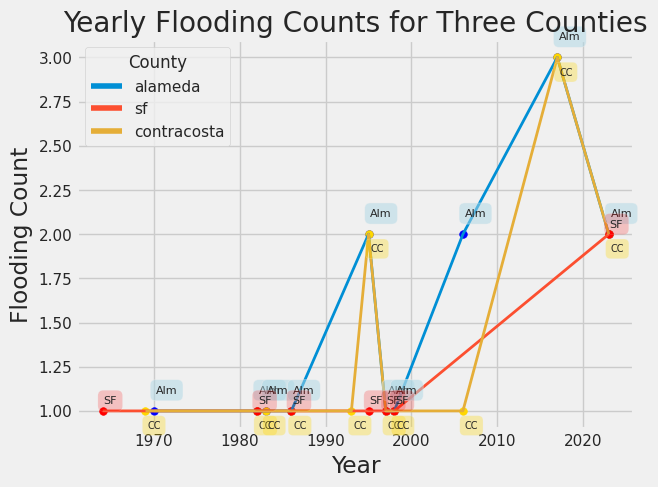

In [27]:
# Prepare the data: combine alameda, sf, and contracosta
contracosta['County'] = 'contracosta'
sf['County'] = 'sf'
alameda['County'] = 'alameda'
# Concatenate the data for all counties
all_county_data = pd.concat([alameda, sf, contracosta], axis=0).reset_index(drop=True)

# Create a line plot of yearly flooding counts
sns.lineplot(data=all_county_data, x='Year', y='is_flood', hue='County', linewidth=2)
plt.scatter(x=alameda['Year'], y=alameda["is_flood"], c='blue', s=30)
plt.scatter(x=contracosta['Year'], y=contracosta["is_flood"], c='gold', s=30)
plt.scatter(x=sf['Year'], y=sf["is_flood"], c='red', s=30)

# add box and text for each county data record
boxstyle=matplotlib.patches.BoxStyle("Round", pad=0.5)
for i in range(alameda.shape[0]):
    plt.text(x=alameda.Year[i]+0.2, y=alameda.is_flood[i]+0.1, s='Alm', fontsize=8, bbox=dict(boxstyle=boxstyle, facecolor='lightblue', alpha=0.5))

for i in range(contracosta.shape[0]):
    plt.text(x=contracosta.Year[i]+0.2, y=contracosta.is_flood[i]-0.1, s='CC', fontsize=7, bbox=dict(boxstyle=boxstyle, facecolor='gold', alpha=0.3))

for i in range(sf.shape[0]):
    plt.text(x=sf.Year[i]+0.1, y=sf.is_flood[i]+0.04, s='SF', fontsize=8, bbox=dict(boxstyle=boxstyle, facecolor='red', alpha=0.2))

# Set the plot title and axes labels
plt.title('Yearly Flooding Counts for Three Counties')
plt.xlabel('Year')
plt.ylabel('Flooding Count')

# Display the plot
plt.show()

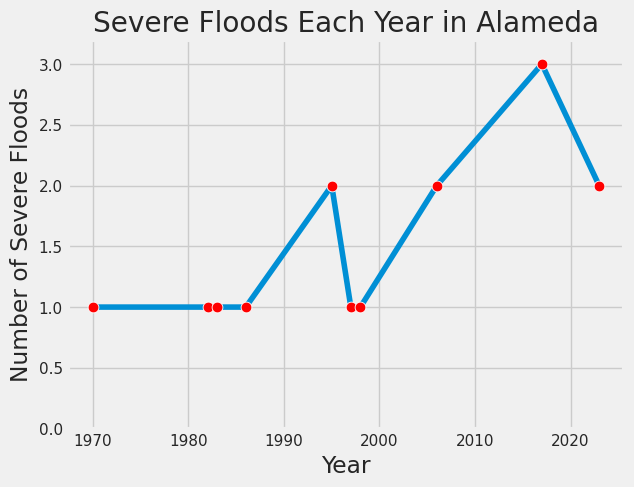

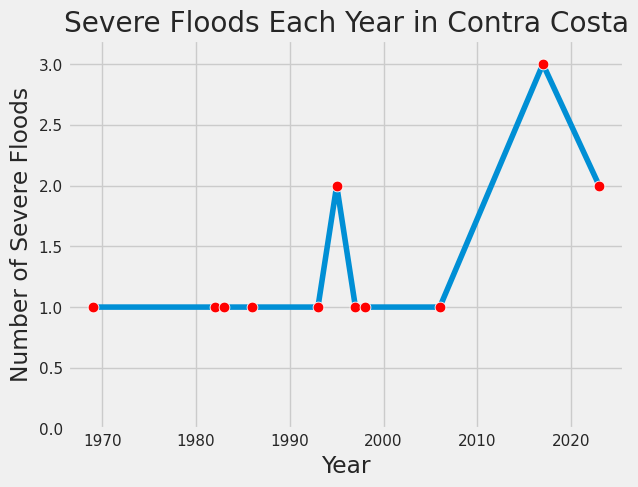

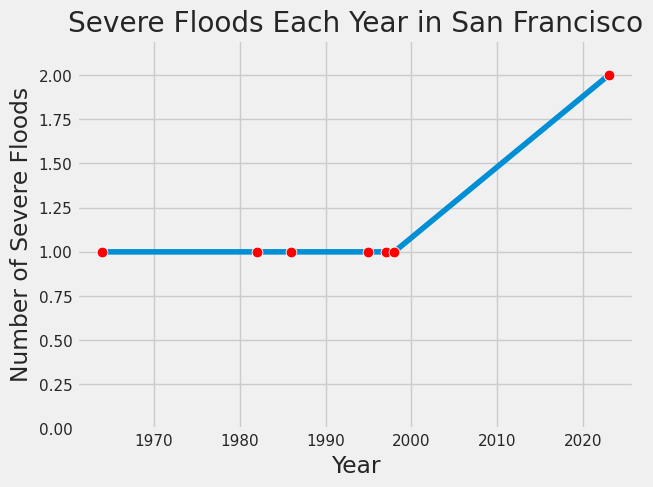

In [28]:
sns.lineplot(data=alameda, x='Year', y="is_flood", zorder=1)
sns.scatterplot(data=alameda, x='Year', y="is_flood", color='red', s=60, zorder=2)
# sns.lineplot(data=contracosta, x="fy_declared", y="is_flood")
# sns.lineplot(data=sf, x="fy_declared", y="is_flood")

# plt.plot(alameda['fy_declared'], alameda['is_flood'], label='Alameda')
# plt.plot(contracosta['fy_declared'], contracosta['is_flood'], label='Contra Costa')
# plt.plot(sf['fy_declared'], sf['is_flood'], label='San Francisco')
plt.xlabel('Year')
plt.ylabel('Number of Severe Floods')
plt.title('Severe Floods Each Year in Alameda')
plt.ylim(0, 3.2)
plt.show()

sns.lineplot(data=contracosta, x='Year', y="is_flood", zorder=1)
sns.scatterplot(data=contracosta, x='Year', y="is_flood", color='red', s=60, zorder=2)
plt.xlabel('Year')
plt.ylabel('Number of Severe Floods')
plt.title('Severe Floods Each Year in Contra Costa')
plt.ylim(0, 3.2)
plt.show()

sns.lineplot(data=sf, x='Year', y="is_flood", zorder=1)
sns.scatterplot(data=sf, x='Year', y="is_flood", color='red', s=60, zorder=2)
plt.xlabel('Year')
plt.ylabel('Number of Severe Floods')
plt.title('Severe Floods Each Year in San Francisco')
plt.ylim(0, 2.2)
plt.show()

Some things to notice: Both Alameda and Contra Costa Had spikes in flooding in 1995 and 2016. San Francisco has seen less flooding overall than the other two counties, but all three see a general increase in flooding over time. Years not reported didn't have floods that were considered severe.

In [29]:
# All of the Target South Bay Counties
target_flood_by_year = target_area_flood.groupby('Year', as_index=False).agg(lambda x: sum(x))
target_flood_by_year = target_flood_by_year.drop(['FIPS Code', 'disaster_number', 'place_code'], axis=1)
target_flood_by_year

,Year,caused_landslide,is_flood
0,1969,0,1
1,1970,0,1
2,1982,2,2
3,1983,2,2
4,1986,0,2
5,1993,1,1
6,1995,5,5
7,1997,3,3
8,1998,0,3
9,2006,3,3


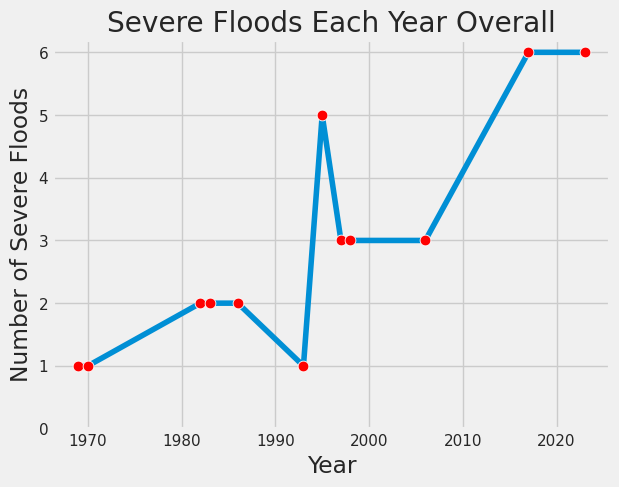

In [30]:
sns.lineplot(data=target_flood_by_year, x='Year', y="is_flood", zorder=1)
sns.scatterplot(data=target_flood_by_year, x='Year', y="is_flood", color='red', s=60, zorder=2)
plt.xlabel('Year')
plt.ylabel('Number of Severe Floods')
plt.title('Severe Floods Each Year Overall')
plt.ylim(0, 6.2)
plt.show()

(0.0, 14.0)

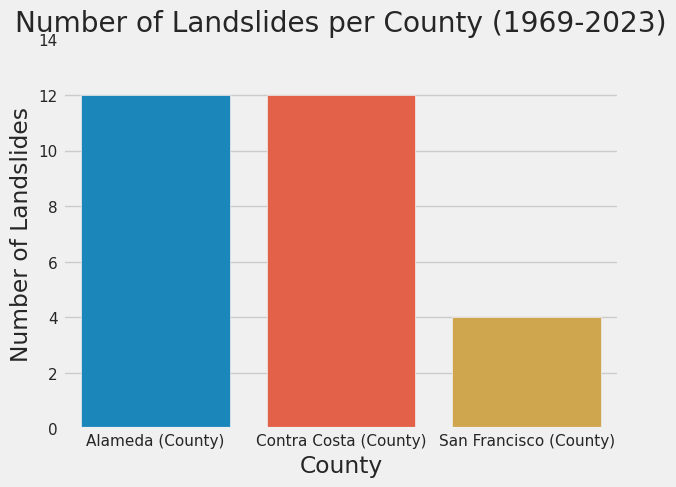

In [31]:
TA_flood_by_county2 = target_area_flood.groupby('County', as_index=False).sum()
sns.barplot(data=TA_flood_by_county2, x='County', y='caused_landslide')
plt.title('Number of Landslides per County (1969-2023)')
plt.ylabel('Number of Landslides')
plt.ylim(0, 14)

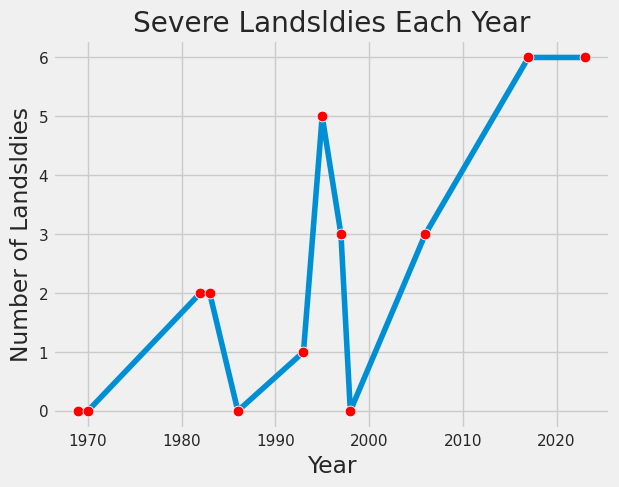

In [32]:
sns.lineplot(data=target_flood_by_year, x='Year', y="caused_landslide", zorder=1)
sns.scatterplot(data=target_flood_by_year, x='Year', y="caused_landslide", color='red', s=60, zorder=2)
plt.xlabel('Year')
plt.ylabel('Number of Landsldies')
plt.title('Severe Landsldies Each Year')
plt.show()

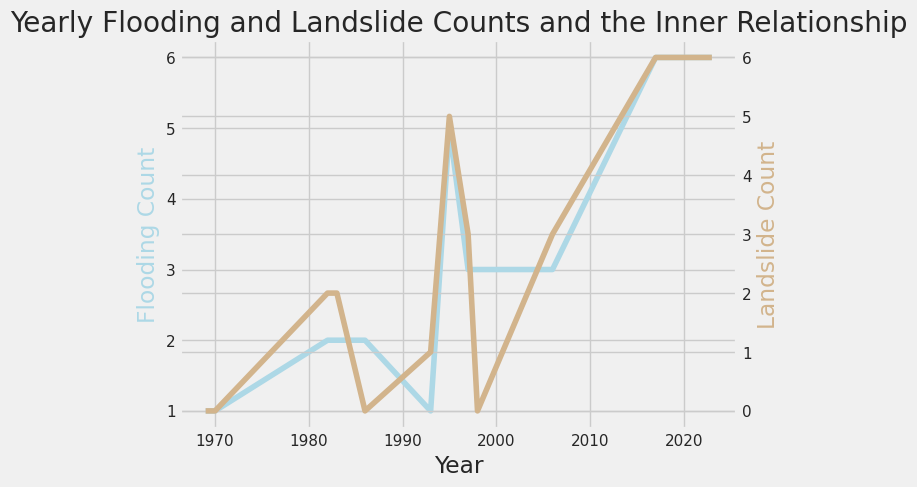

In [33]:
# Create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the yearly flooding counts on the first y-axis
sns.lineplot(data=target_flood_by_year, x='Year', y='is_flood', color='#ADD8E6', ax=ax1)
ax1.set_ylabel('Flooding Count', color='#ADD8E6')

# Plot the yearly landslide counts on the second y-axis
sns.lineplot(data=target_flood_by_year, x='Year', y='caused_landslide', color='#D2B48C', ax=ax2)
ax2.set_ylabel('Landslide Count', color='#D2B48C')

# Add labels and title
plt.xlabel('Year')
plt.title('Yearly Flooding and Landslide Counts and the Inner Relationship')
# Show the plot
plt.show()

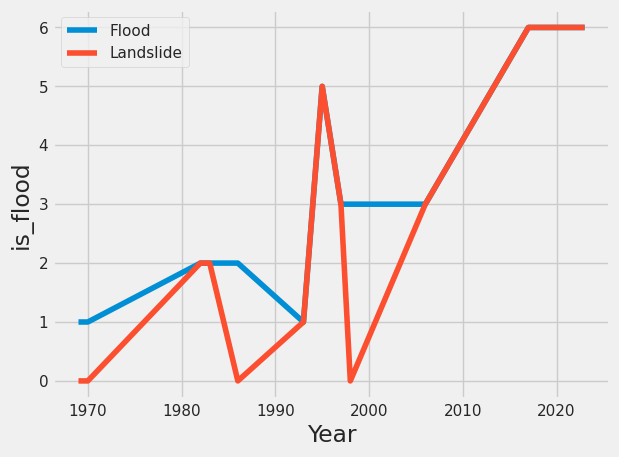

In [34]:
# lineplot makes no sense in this exampe - Manan

fig, ax = plt.subplots()
sns.lineplot(data=target_flood_by_year, x='Year', y="is_flood", ax=ax, label='Flood')
# sns.scatterplot(data=target_flood_by_year, x='Year', y="is_flood", color='red', s=70, zorder=2)
sns.lineplot(data=target_flood_by_year, x='Year', y="caused_landslide", ax=ax, label='Landslide')
# sns.scatterplot(data=target_flood_by_year, x='Year', y="caused_landslide", color='green', s=50, zorder=2)
ax.legend()
plt.show()

As we can see, most of the Floods and Storms also caused Landslides of some kind.

In [35]:
target_flood_by_year.columns

Index(['Year', 'caused_landslide', 'is_flood'], dtype='object')

In [36]:
alameda_county_lat_bounds = (37.33, 38.21)
alameda_county_lon_bounds = (-121.45, -122.47)

In [37]:
import pandas as pd
import folium
from folium.plugins import HeatMap

county_centers = {
    'Alameda (County)': [37.648081, -121.913835],
    'Contra Costa (County)': [37.919184, -121.928953],
    'San Francisco (County)': [37.7749, -122.4194]
}

# Load data with county-level information
data = target_area_flood

# Keep only relevant columns
data = data[['County', 'is_flood']]

# Group by county and sum the number of flood events
county_data = data.groupby('County').sum()

# Reset the index to create a DataFrame with the county names as a column
county_data = county_data.reset_index()

# Create a map centered on the Bay Area
bay_area = [37.7749, -122.4194]
m = folium.Map(location=bay_area, zoom_start=9)

heat_data = []
for index, row in county_data.iterrows():
    county = row['County']
    lat, lon = county_centers[county]
    is_flood = row['is_flood']
    heat_data.append([lat, lon, is_flood])

HeatMap(heat_data, name='Heat Map', radius=15, blur=10).add_to(m)

# Display map
m

(0.0, 14.0)

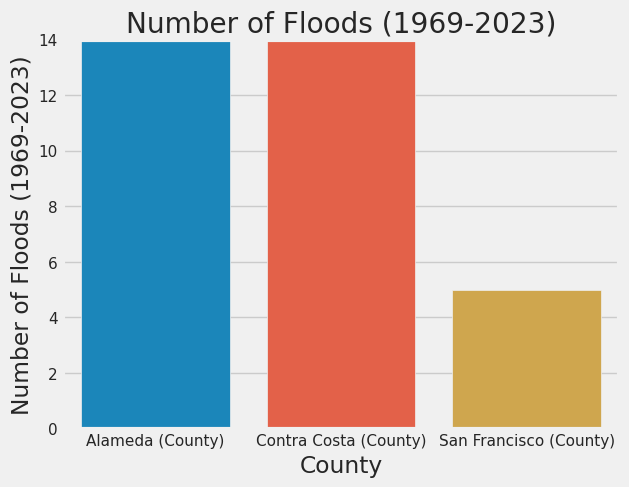

In [38]:
TA_flood_by_county2 = target_area_flood.groupby('County', as_index=False).sum()
sns.barplot(data=TA_flood_by_county2, x='County', y='is_flood')
plt.title('Number of Floods (1969-2023)')
plt.ylabel('Number of Floods (1969-2023)')
plt.ylim(0, 14)

In [39]:
target_area_flood['Year'].value_counts()

2017    6
2023    6
1995    5
1997    3
1998    3
2006    3
1986    2
1982    2
1983    2
1993    1
1969    1
1970    1
Name: Year, dtype: int64

We have a lot of missing years, so I'm going to add new rows for those missing years, indicating that there was no flooding and no landslides that year (these are mainly for the more severe ones that actually get reported).

Then I'm going to add another column, labeling the year ranges: 

[1969-1975, 1976-1982, 1983-1989, 1990-1996, 1997-2003, 2004-2011, 2012-2018, 2019-2023]

In [40]:
def add_missing_years(df):
    # get all unique county values
    counties = df['County'].unique()
    
    # create a new dataframe with the missing years
    new_df = pd.DataFrame(columns=df.columns)
    
    # iterate over each year
    for year in range(df['Year'].min(), df['Year'].max()+1):
        # get all counties for the current year
        counties_in_year = df.loc[df['Year'] == year, 'County'].unique()
        
        # iterate over each county
        for county in counties:
            # add a new row for the current year and county if it doesn't exist
            if county not in counties_in_year:
                new_row = pd.DataFrame({'Year': [year],
                                        'is_flood': [0],
                                        'caused_landslide': [0],
                                        'County': [county]})
                
                # add the new row to the new dataframe
                new_df = pd.concat([new_df, new_row], ignore_index=True)
        
        # add all rows for the current year to the new dataframe
        new_df = pd.concat([new_df, df.loc[df['Year'] == year]], ignore_index=True)
    
    # sort the dataframe by county and year
    new_df = new_df.sort_values(by=['County', 'Year'])
    
    return new_df


In [41]:
target_area_flood = add_missing_years(target_area_flood)
target_area_flood.head()

,FIPS Code,County,Year,Date,caused_landslide,is_flood,Description,incident_type,fema_declaration_string,disaster_number,place_code,declaration_type
0,NaN,Alameda (County),1969,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,6001,Alameda (County),1970,1970-02-16T00:00:00Z,0,1,Severe Storms & Flooding,Flood,DR-283-CA,283,99001,DR
7,NaN,Alameda (County),1971,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,Alameda (County),1972,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,Alameda (County),1973,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
def assign_year_range(df):
    year_ranges = [
        {'range': '1969-1975', 'start': 1969, 'end': 1975},
        {'range': '1976-1982', 'start': 1976, 'end': 1982},
        {'range': '1983-1989', 'start': 1983, 'end': 1989},
        {'range': '1990-1996', 'start': 1990, 'end': 1996},
        {'range': '1997-2003', 'start': 1997, 'end': 2003},
        {'range': '2004-2011', 'start': 2004, 'end': 2011},
        {'range': '2012-2018', 'start': 2012, 'end': 2018},
        {'range': '2019-2023', 'start': 2019, 'end': 2023}
    ]
    # create new column with empty values
    df['Year Range'] = ''
    # loop through each year range
    for yr_range in year_ranges:
        # find all rows where year is within the current range
        mask = (df['Year'] >= yr_range['start']) & (df['Year'] <= yr_range['end'])
        # assign the range to the 'Year Range' column
        df.loc[mask, 'Year Range'] = yr_range['range']
    return df


In [43]:
target_area_flood = assign_year_range(target_area_flood)
target_area_flood['County'] = target_area_flood['County'].apply(lambda x: x.replace(' (County)', ''))
# define the county_coords and county_fips dictionaries
county_coords = {
    'Alameda': [37.6485, -121.9170],
    'Contra Costa': [37.8534, -121.9018],
    'San Francisco': [37.7749, -122.4194]
}

county_fips = {
    'Alameda': '06001',
    'Contra Costa': '06013',
    'San Francisco': '06075'
}

# loop through the 'County' column and assign latitude, longitude, and FIPS code values to new columns
target_area_flood['Latitude'] = target_area_flood['County'].apply(lambda x: county_coords[x][0])
target_area_flood['Longitude'] = target_area_flood['County'].apply(lambda x: county_coords[x][1])
target_area_flood['FIPS Code'] = target_area_flood['County'].apply(lambda x: county_fips[x])
target_area_flood

,FIPS Code,County,Year,Date,caused_landslide,is_flood,Description,incident_type,fema_declaration_string,disaster_number,place_code,declaration_type,Year Range,Latitude,Longitude
0,06001,Alameda,1969,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1969-1975,37.6485,-121.9170
5,06001,Alameda,1970,1970-02-16T00:00:00Z,0,1,Severe Storms & Flooding,Flood,DR-283-CA,283,99001,DR,1969-1975,37.6485,-121.9170
7,06001,Alameda,1971,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1969-1975,37.6485,-121.9170
10,06001,Alameda,1972,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1969-1975,37.6485,-121.9170
13,06001,Alameda,1973,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1969-1975,37.6485,-121.9170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,06075,San Francisco,2020,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2019-2023,37.7749,-122.4194
165,06075,San Francisco,2021,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2019-2023,37.7749,-122.4194
168,06075,San Francisco,2022,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2019-2023,37.7749,-122.4194
169,06075,San Francisco,2023,2023-01-09T00:00:00Z,1,1,"Severe Winter Storms, Flooding, And Mudslides",Flood,EM-3591-CA,3591,99075,EM,2019-2023,37.7749,-122.4194


In [44]:
target_area_flood.to_csv('Berkeley_Area_Flooding.csv', index=False)

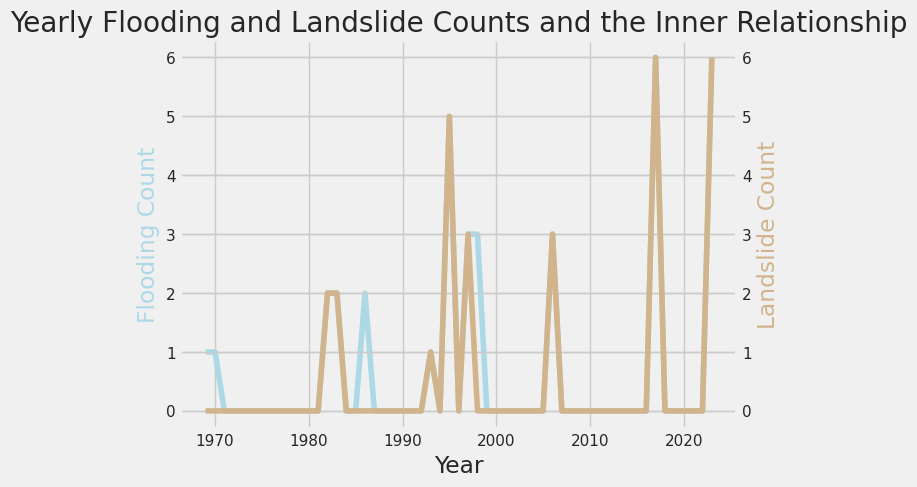

In [45]:
# Don't use

target_flood_by_year2 = target_area_flood.groupby('Year', as_index=False).agg(lambda x: sum(x))
# target_flood_by_year2 = target_flood_by_year2.drop(['FIPS Code', 'disaster_number', 'place_code'], axis=1)

# Create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the yearly flooding counts on the first y-axis
sns.lineplot(data=target_flood_by_year2, x='Year', y='is_flood', color='#ADD8E6', ax=ax1)
ax1.set_ylabel('Flooding Count', color='#ADD8E6')

# Plot the yearly landslide counts on the second y-axis
sns.lineplot(data=target_flood_by_year2, x='Year', y='caused_landslide', color='#D2B48C', ax=ax2)
ax2.set_ylabel('Landslide Count', color='#D2B48C')

# Add labels and title
plt.xlabel('Year')
plt.title('Yearly Flooding and Landslide Counts and the Inner Relationship')
# Show the plot
plt.rcParams['figure.figsize'] = [4, 10]
plt.show()

In [48]:
target_area_flood.to_csv('Berkeleyt_Area_Floods.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6062e091-af91-4518-84bb-d2aa585f2b30' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>